In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
raw_df = pd.read_csv('sph6004_assignment1_data.csv')

In [134]:
raw_df.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,36570066,3,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,NaN,236.0,318.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,39307659,0,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,82.0
2,38743306,2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,62.1
3,32339865,2,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,NaN,NaN,NaN,15.0,1.0,0.0,1.0,1.0,170.0,113.1
4,35526987,2,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,NaN,NaN,NaN,15.0,NaN,0.0,1.0,1.0,178.0,97.4


In [135]:
raw_df.describe()

,id,aki,admission_age,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
count,5.092000e+04,50920.000000,50920.000000,50841.000000,50841.000000,50841.000000,50823.000000,50823.000000,50823.000000,50823.000000,...,472.000000,14689.000000,14689.000000,50685.000000,50266.000000,50407.000000,50542.000000,50685.000000,25011.000000,49900.000000
mean,3.498391e+07,1.300393,64.942008,69.902996,102.494951,84.266427,93.250232,148.234674,119.102894,47.337019,...,155.271186,470.911158,582.595412,13.702141,5.167549,3.385066,3.124471,0.205643,169.628199,81.537677
std,2.893873e+06,1.088128,17.278264,15.141810,20.481365,15.726366,17.550959,22.737214,16.375046,11.743710,...,291.000322,997.308493,1461.193067,2.649433,1.665102,2.090396,1.106433,0.404174,10.683969,36.206192
min,3.000015e+07,0.000000,18.002527,1.000000,36.000000,28.500000,0.108000,34.000000,32.000000,1.000000,...,6.000000,31.000000,31.000000,3.000000,1.000000,0.000000,1.000000,0.000000,122.000000,1.000000
25%,3.246663e+07,0.000000,54.503884,60.000000,88.000000,73.229167,83.000000,132.000000,107.470588,40.000000,...,21.000000,195.000000,203.000000,14.000000,5.000000,1.000000,3.000000,0.000000,163.000000,65.900000
50%,3.498649e+07,1.000000,66.713334,69.000000,100.000000,82.769231,92.000000,146.000000,116.925926,47.000000,...,52.000000,262.000000,277.000000,15.000000,6.000000,5.000000,4.000000,0.000000,170.000000,78.400000
75%,3.748413e+07,2.000000,78.151289,79.000000,114.000000,94.080000,103.000000,161.000000,129.093074,54.000000,...,154.250000,396.000000,437.000000,15.000000,6.000000,5.000000,4.000000,0.000000,178.000000,93.000000
max,3.999981e+07,3.000000,102.865603,167.000000,280.000000,174.740741,195.000000,357.000000,215.857143,113.000000,...,2720.000000,22890.000000,63325.000000,15.000000,6.000000,5.000000,4.000000,1.000000,226.000000,5864.000000


In [136]:
# encoding female to 0, male to 1

raw_df.loc[raw_df.gender == 'F', 'gender'] = 0
raw_df.loc[raw_df.gender == 'M', 'gender'] = 1

In [137]:
# dropping features with > 50% missing values
missing_percentage = (raw_df.isna().sum() / len(raw_df)) * 100

# Identify features with more than 50% missing values
features_to_drop = missing_percentage[missing_percentage >= 50].index

print(len(features_to_drop))

raw_df_filtered = raw_df.drop(columns=features_to_drop)
raw_df_filtered.shape

75


(50920, 87)

In [138]:
raw_df_filtered.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit
0,36570066,3,0,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,11.9,12.0,28.6,29.5,15.0,6.0,5.0,4.0,0.0,110.0
1,39307659,0,0,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,20.0,24.7,28.4,150.0,15.0,6.0,5.0,4.0,0.0,82.0
2,38743306,2,0,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,12.1,12.1,26.0,26.0,15.0,6.0,5.0,4.0,0.0,62.1
3,32339865,2,0,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,12.8,12.8,26.1,26.1,15.0,1.0,0.0,1.0,1.0,113.1
4,35526987,2,1,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,10.4,11.9,27.7,39.4,15.0,NaN,0.0,1.0,1.0,97.4


In [139]:
# Imputing remaining missing values with the median values from the same class label
nan_counts_per_feature = raw_df_filtered.isna().sum(axis=0)
features_with_nan = nan_counts_per_feature[nan_counts_per_feature > 0].index.tolist()
print("NaN counts for each feature:")
print(nan_counts_per_feature)
print(features_with_nan)


NaN counts for each feature:
id                  0
aki                 0
gender              0
admission_age       0
race                0
                 ... 
gcs_motor         654
gcs_verbal        513
gcs_eyes          378
gcs_unable        235
weight_admit     1020
Length: 87, dtype: int64
['heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean', 'mbp_min', 'mbp_max', 'mbp_mean', 'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'temperature_min', 'temperature_max', 'temperature_mean', 'spo2_min', 'spo2_max', 'spo2_mean', 'glucose_min', 'glucose_max', 'glucose_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max', 'po2_min', 'po2_max', 'pco2_min', 'pco2_max', 'baseexcess_min', 'baseexcess_max', 'totalco2_min', 'totalco2_max', 'hematocrit_min.1', 'hematocrit_max.1', 'hemoglobin_min.1', 'hemoglobin_max.1', 'platelets_min', 'platelets_max', 'wbc_min', 'wbc_max', 'aniongap_min', 'aniongap_max', 'bicarbonate_min.1', 

In [140]:
median_per_feature = raw_df_filtered[features_with_nan].median()

for feature in features_with_nan:
    raw_df_filtered[feature].fillna(median_per_feature[feature], inplace=True)

In [141]:
# checking if there are remaining nan values after imputation
nan_counts_per_feature = raw_df_filtered.isna().sum(axis=0)
print("NaN counts for each feature:")
print(nan_counts_per_feature)

NaN counts for each feature:
id               0
aki              0
gender           0
admission_age    0
race             0
                ..
gcs_motor        0
gcs_verbal       0
gcs_eyes         0
gcs_unable       0
weight_admit     0
Length: 87, dtype: int64


In [142]:
raw_df_filtered.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit
0,36570066,3,0,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,11.9,12.0,28.6,29.5,15.0,6.0,5.0,4.0,0.0,110.0
1,39307659,0,0,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,20.0,24.7,28.4,150.0,15.0,6.0,5.0,4.0,0.0,82.0
2,38743306,2,0,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,12.1,12.1,26.0,26.0,15.0,6.0,5.0,4.0,0.0,62.1
3,32339865,2,0,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,12.8,12.8,26.1,26.1,15.0,1.0,0.0,1.0,1.0,113.1
4,35526987,2,1,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,10.4,11.9,27.7,39.4,15.0,6.0,0.0,1.0,1.0,97.4


In [143]:
# Reducing number of race
raw_df_filtered[["race_encode"]] = 'placeholder'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('asian|indian'), "race_encode"] = 'Asian'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('black'), "race_encode"] = 'African'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('white|portuguese'), "race_encode"] = 'Caucasian'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('hispanic'), "race_encode"] = 'Hispanic'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('other|multiple|unknown|declined|unable'), "race_encode"] = 'Not Specified'
raw_df_filtered.loc[raw_df_filtered.race.astype(str).str.lower().str.contains('south american'), "race_encode"] = 'South American'


In [144]:
raw_df_filtered.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit,race_encode
0,36570066,3,0,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,12.0,28.6,29.5,15.0,6.0,5.0,4.0,0.0,110.0,African
1,39307659,0,0,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,24.7,28.4,150.0,15.0,6.0,5.0,4.0,0.0,82.0,Caucasian
2,38743306,2,0,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,12.1,26.0,26.0,15.0,6.0,5.0,4.0,0.0,62.1,Caucasian
3,32339865,2,0,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,12.8,26.1,26.1,15.0,1.0,0.0,1.0,1.0,113.1,Not Specified
4,35526987,2,1,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,11.9,27.7,39.4,15.0,6.0,0.0,1.0,1.0,97.4,Caucasian


In [145]:
raw_df_filtered.race_encode.unique()

array(['African', 'Caucasian', 'Not Specified', 'Asian', 'Hispanic',
       'South American'], dtype=object)

In [146]:
# one-hot encoding of race

raw_df_filtered = pd.get_dummies(raw_df_filtered, columns=['race_encode'])
raw_df_filtered.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,gcs_verbal,gcs_eyes,gcs_unable,weight_admit,race_encode_African,race_encode_Asian,race_encode_Caucasian,race_encode_Hispanic,race_encode_Not Specified,race_encode_South American
0,36570066,3,0,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,5.0,4.0,0.0,110.0,1,0,0,0,0,0
1,39307659,0,0,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,5.0,4.0,0.0,82.0,0,0,1,0,0,0
2,38743306,2,0,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,5.0,4.0,0.0,62.1,0,0,1,0,0,0
3,32339865,2,0,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,0.0,1.0,1.0,113.1,0,0,0,0,1,0
4,35526987,2,1,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,0.0,1.0,1.0,97.4,0,0,1,0,0,0


In [147]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [148]:
X = raw_df_filtered.drop(['aki', 'race'], axis=1)
y = raw_df_filtered.aki

column_list = X.columns.tolist()

# Split dataset into training set, test set, and holdout set

X_train_temp, X_holdout, y_train_temp, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_train_temp, test_size=0.22222, random_state=42) 

print(X_train.shape)
print(X_test.shape)
print(X_holdout.shape)

(35644, 91)
(10184, 91)
(5092, 91)


### Data pre-processing steps completed, ready for model training

### Decision tree model

In [149]:
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree

In [150]:
# building base decision tree model

base_tree = DTC(criterion = 'entropy', max_depth = 5, random_state=42)
base_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [151]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

y_train_pred = base_tree.predict(X_train)
y_test_pred = base_tree.predict(X_test)
y_test_pred_proba = base_tree.predict_proba(X_test)

print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[7605    0 3784  408]
 [3007    0 3284  581]
 [3834    0 6772  838]
 [1127    0 2725 1679]]
[[2132    0 1068  139]
 [ 894    0  914  153]
 [1079    0 1938  279]
 [ 353    0  778  457]]


In [152]:
auroc_test = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr', average='macro')
print(auroc_test)

0.6604466745139188


In [153]:
# Get feature importance scores
importance_scores = base_tree.feature_importances_

# Sort features based on importance scores
sorted_indices = importance_scores.argsort()[::-1]

# Get feature names
feature_names = X_train.columns  # Assuming your features are in a pandas DataFrame

# Print feature importance ranking
feature_ranking = []
feature_ranking_total = []
print("Feature Importance Ranking:")
for i, index in enumerate(sorted_indices):
    print(f"{i+1}. {feature_names[index]}: {importance_scores[index]}")
    feature_ranking.append(X.columns[index])
    feature_ranking_total.append(X.columns[index])
print(feature_ranking)

Feature Importance Ranking:
1. bun_max: 0.38275760500883454
2. weight_admit: 0.130988350489811
3. gcs_verbal: 0.11574466584417796
4. admission_age: 0.09943156162809808
5. baseexcess_min: 0.07856091542458152
6. totalco2_max: 0.06525685624823338
7. pt_max: 0.03294805821052209
8. aniongap_min: 0.023704994451902273
9. dbp_min: 0.014218232566781695
10. ptt_max: 0.0135141098092465
11. po2_max: 0.008205971465217628
12. aniongap_max: 0.008064426132841293
13. ptt_min: 0.0075397806139722405
14. calcium_min.1: 0.005760327742229914
15. spo2_max: 0.00547560145843979
16. mbp_min: 0.003964219548696918
17. sodium_min.1: 0.0038643233564132477
18. glucose_min: 0.0
19. po2_min: 0.0
20. pco2_min: 0.0
21. ph_max: 0.0
22. totalco2_min: 0.0
23. baseexcess_max: 0.0
24. ph_min: 0.0
25. lactate_max: 0.0
26. lactate_min: 0.0
27. glucose_mean: 0.0
28. glucose_max: 0.0
29. pco2_max: 0.0
30. race_encode_South American: 0.0
31. spo2_mean: 0.0
32. spo2_min: 0.0
33. gender: 0.0
34. heart_rate_min: 0.0
35. heart_rate_m

In [23]:
def forward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric, max_features=None):
    selected_features = []
    best_performance = float('-inf')
    
    if max_features is None:
        max_features = len(feature_ranking)
    
    for feature in feature_ranking:
        selected_features.append(feature)
        X_subset = X[selected_features]
        
        # Train model
        model.fit(X_subset, y)
        
        # Evaluate performance
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict_proba(X_test[selected_features]), multi_class='ovr', average='macro')
        
        # Check if performance improved
        if performance > best_performance:
            best_performance = performance
            if len(selected_features) == max_features:
                break
        elif performance <= best_performance:
            selected_features.pop()        
    
    return selected_features, best_performance

In [24]:
forward_feature_selection_roc_test(X_train, y_train, X_test, y_test, feature_ranking, base_tree, roc_auc_score, max_features=15)

(['bun_max',
  'weight_admit',
  'gcs_verbal',
  'admission_age',
  'totalco2_max',
  'pt_max',
  'aniongap_min',
  'po2_max',
  'aniongap_max',
  'po2_min',
  'totalco2_min',
  'chloride_min.1'],
 0.6639265037819551)

In [25]:
def backward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric):
    
    best_performance = float('-inf')
    selected_features = feature_ranking
    model.fit(X, y) 
    y_pred = model.predict(X_test)
    best_performance = metric(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')
    for i in range(len(feature_ranking)-1):
        last_feature = selected_features.pop()
        model.fit(X[selected_features], y) 
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict_proba(X_test[selected_features]), multi_class='ovr', average='macro')
        if best_performance - performance < 0.001:
            best_performance = performance
        else:
            selected_features.append(last_feature)
            break

    
    return selected_features, best_performance

In [26]:
backward_feature_selection_roc_test(X_train, y_train, X_test, y_test, feature_ranking, base_tree, roc_auc_score)

(['bun_max',
  'weight_admit',
  'gcs_verbal',
  'admission_age',
  'baseexcess_min',
  'totalco2_max',
  'pt_max'],
 0.6598312673737805)

In [27]:
# generating the first 2 parent chromosomes for genetic feature selection algorithm

forward_features = ['bun_max',
  'weight_admit',
  'gcs_verbal',
  'admission_age',
  'totalco2_max',
  'pt_max',
  'aniongap_min',
  'po2_max',
  'aniongap_max',
  'po2_min',
  'totalco2_min',
  'chloride_min.1']

backward_features = ['bun_max',
  'weight_admit',
  'gcs_verbal',
  'admission_age',
  'baseexcess_min',
  'totalco2_max',
  'pt_max']

forward_parent_chromosome = [1 if feature in forward_features else 0 for feature in feature_ranking_total]
backward_parent_chromosome = [1 if feature in backward_features else 0 for feature in feature_ranking_total]
print(forward_parent_chromosome)
print(backward_parent_chromosome)

[1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [28]:
from geneal.genetic_algorithms import BinaryGenAlgSolver

class MyBinaryGenAlgSolver(BinaryGenAlgSolver):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def fitness_function(self, chromosome):
        selected_features = np.where(chromosome)[0]
        selected_features_list = []
        for i in selected_features:
            selected_features_list.append(column_list[i])
        X_train_subset = X_train[selected_features_list]

    
        base_tree.fit(X_train_subset, y_train)

        X_test_subset = X_test[selected_features_list]

        y_pred_proba = base_tree.predict_proba(X_test_subset)

        # Calculate AUROC as the fitness score
        auroc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

        return auroc
        """
        Example fitness function.
        """
        # This is just a placeholder. You should implement your own fitness function logic here.
        # For example, you could compute a score based on the number of ones in the chromosome.
        #return np.sum(chromosome)

    def initialize_population(self):
        """
        Initializes the population of the problem.
        """
        # Randomly initialize the population using numpy's random.randint method.
        forward_parent_chromosome = [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
        backward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        bits_array = [forward_parent_chromosome, backward_parent_chromosome]

        for _ in range(self.pop_size-2):
            bits = np.zeros(self.n_genes)
            bits[: np.random.randint(0, self.n_genes)] = 1
            np.random.shuffle(bits)

            bits_array.append(bits)

        return np.array(bits_array)

    def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
        """
        Creates an offspring from 2 parents with a random crossover point based on a probability.

        :param first_parent: The chromosome of the first parent.
        :param sec_parent: The chromosome of the second parent.
        :param crossover_prob: The probability of crossover.
        :return: The resulting offspring chromosome.
        """
        n_genes = len(first_parent)
        crossover_mask = np.random.rand(n_genes) < 0.5

    # Select a random crossover point
        crossover_pt = np.random.randint(1, n_genes)

    # Perform crossover based on the crossover mask
        offspring = np.where(crossover_mask, sec_parent, first_parent)

        return offspring

    def mutate_population(self, population, n_mutations):
        """
        Mutates the population by flipping bits randomly.
        """
        mutation_rows, mutation_cols = super(
            BinaryGenAlgSolver, self
        ).mutate_population(population, n_mutations)

        population[mutation_rows, mutation_cols] = np.abs(population - 1)[
            mutation_rows, mutation_cols
        ]

        return population

Iteration: 5
Best fitness: 0.6639178873888922
Iteration: 10
Best fitness: 0.6651723790325812
Iteration: 15
Best fitness: 0.6656458315449446
Iteration: 20
Best fitness: 0.6658068497187685
Iteration: 25
Best fitness: 0.6660692834013983
Iteration: 30
Best fitness: 0.6660692834013983
Iteration: 35
Best fitness: 0.6660692834013983
Iteration: 40
Best fitness: 0.6660692834013983
Iteration: 45
Best fitness: 0.6660692834013983
Iteration: 50
Best fitness: 0.6660692834013983


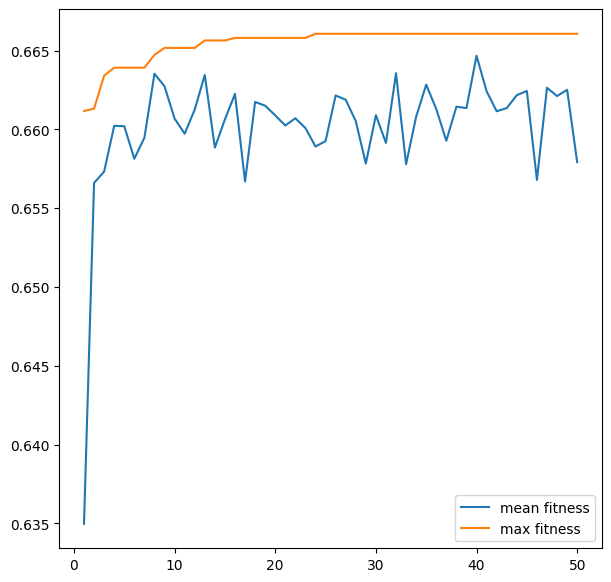


#############################
#			STATS			#
#############################


Total running time: 3 minutes, 14 seconds


Population size: 10
Number variables: 91
Selection rate: 0.25
Mutation rate: 0.1
Number Generations: 50

Best fitness: 0.6660692834013983
Best individual: [0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
None


In [29]:
solver = MyBinaryGenAlgSolver(pop_size=10, n_genes=91, mutation_rate=0.1, max_gen=50, selection_rate=0.25)
best_solution = solver.solve()
print(best_solution)

In [30]:
Best_individual = [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,]

selected_features = [feature_ranking_total[i] for i, value in enumerate(Best_individual) if value == 1]
print(selected_features)

['weight_admit', 'gcs_verbal', 'admission_age', 'totalco2_max', 'pt_max', 'aniongap_min', 'dbp_min', 'aniongap_max', 'calcium_min.1', 'spo2_max', 'mbp_min', 'ph_max', 'totalco2_min', 'baseexcess_max', 'lactate_min', 'glucose_max', 'pco2_max', 'gender', 'heart_rate_max', 'sbp_min', 'sbp_max', 'sbp_mean', 'mbp_max', 'resp_rate_max', 'hemoglobin_min.1', 'abs_monocytes_min', 'abs_monocytes_max', 'abs_neutrophils_min', 'abs_neutrophils_max', 'inr_max', 'gcs_min', 'gcs_eyes', 'gcs_unable', 'race_encode_Asian', 'race_encode_Hispanic', 'abs_eosinophils_min', 'bun_min', 'hemoglobin_max.1', 'platelets_min', 'abs_basophils_min', 'chloride_max.1', 'glucose_max.2', 'sodium_max.1', 'potassium_max.1', 'id']


In [31]:
# Reducing feature dimension of train and test data after genetic algorithm feature selection

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [32]:
# Base Tree model with selected features

base_tree.fit(X_train_selected, y_train)

y_train_pred = base_tree.predict(X_train_selected)
y_test_pred = base_tree.predict(X_test_selected)
y_test_pred_proba = base_tree.predict_proba(X_test_selected)

In [33]:
print("Train Accuracy:\n", classification_report(y_train, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))
# print("\n\nExternal Test Accuracy:\n", classification_report(y_holdout, y_holdout_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.48      0.67      0.56     11797
           1       0.00      0.00      0.00      6872
           2       0.41      0.56      0.47     11444
           3       0.47      0.31      0.37      5531

    accuracy                           0.45     35644
   macro avg       0.34      0.38      0.35     35644
weighted avg       0.36      0.45      0.39     35644



Test Accuracy:
               precision    recall  f1-score   support

           0       0.48      0.67      0.56      3339
           1       0.00      0.00      0.00      1961
           2       0.41      0.56      0.47      3296
           3       0.44      0.29      0.35      1588

    accuracy                           0.44     10184
   macro avg       0.33      0.38      0.34     10184
weighted avg       0.36      0.44      0.39     10184



C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [34]:
auroc_test = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr', average='macro')
print(auroc_test)

0.6574919651738488


In [62]:
# Hyper-parameter tuning with GridSearchCV

parameters = {'max_depth':np.arange(start=5,stop=10,step=1)}
parameters

{'max_depth': array([5, 6, 7, 8, 9])}

In [63]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [64]:
stratifiedCV = StratifiedKFold(n_splits=5)
base_tree = DTC(criterion='entropy')
BestTree = GridSearchCV(
    base_tree,
    param_grid=parameters,
    scoring='roc_auc_ovr',
    cv=stratifiedCV
)
BestTree.fit(X_train_selected,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': array([5, 6, 7, 8, 9])},
             scoring='roc_auc_ovr')

In [65]:
BestTree.best_params_

{'max_depth': 7}

In [66]:
BestTree.best_score_

0.6522179046241515

In [67]:
y_train_pred = BestTree.predict(X_train_selected)
y_test_pred = BestTree.predict(X_test_selected)
y_holdout_pred = BestTree.predict(X_holdout[selected_features])

y_holdout_proba_pred = BestTree.predict_proba(X_holdout[selected_features])
roc_auc_score(y_holdout, y_holdout_proba_pred, multi_class='ovr', average='macro')

0.6559492960948732

In [68]:
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))
print(confusion_matrix(y_holdout, y_holdout_pred))

[[7550  101 3827  319]
 [2817  154 3536  365]
 [3341   88 7451  564]
 [ 955   87 3060 1429]]
[[2058   29 1158   94]
 [ 826   26  991  118]
 [ 974   28 2076  218]
 [ 299   23  893  373]]
[[1036   16  619   53]
 [ 440   12  490   63]
 [ 476   15  964   93]
 [ 156    8  477  174]]


In [69]:
print("Train Accuracy:\n", classification_report(y_train, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))
print("\n\nExternal Test Accuracy:\n", classification_report(y_holdout, y_holdout_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.51      0.64      0.57     11797
           1       0.36      0.02      0.04      6872
           2       0.42      0.65      0.51     11444
           3       0.53      0.26      0.35      5531

    accuracy                           0.47     35644
   macro avg       0.46      0.39      0.37     35644
weighted avg       0.46      0.47      0.41     35644



Test Accuracy:
               precision    recall  f1-score   support

           0       0.50      0.62      0.55      3339
           1       0.25      0.01      0.03      1961
           2       0.41      0.63      0.49      3296
           3       0.46      0.23      0.31      1588

    accuracy                           0.45     10184
   macro avg       0.40      0.37      0.34     10184
weighted avg       0.41      0.45      0.39     10184



External Test Accuracy:
               precision    recall  f1-score   support

           0 

### SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
smote_sampler = SMOTE(random_state=12,sampling_strategy='auto')
X_df_SMOTE, y_df_SMOTE = smote_sampler.fit_resample(X_train_selected, y_train)

In [72]:
y_train.value_counts()

0    11797
2    11444
1     6872
3     5531
Name: aki, dtype: int64

In [73]:
y_df_SMOTE.value_counts()

3    11797
1    11797
0    11797
2    11797
Name: aki, dtype: int64

In [74]:
BestTree_SMOTE = BestTree.fit(X_df_SMOTE, y_df_SMOTE)

In [75]:
y_train_pred = BestTree_SMOTE.predict(X_df_SMOTE)
y_test_pred = BestTree_SMOTE.predict(X_test_selected)
y_holdout_pred = BestTree_SMOTE.predict(X_holdout[selected_features])

print(confusion_matrix(y_df_SMOTE, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))
print(confusion_matrix(y_holdout, y_holdout_pred))

[[7954  478 2694  671]
 [4097 2542 3255 1903]
 [4110  605 5172 1910]
 [1323  970 2594 6910]]
[[2201  150  752  236]
 [ 945  101  650  265]
 [1211  140 1366  579]
 [ 304   66  583  635]]
[[1115   69  432  108]
 [ 464   54  340  147]
 [ 586   73  628  261]
 [ 161   42  277  335]]


In [76]:
print("Train Accuracy:\n", classification_report(y_df_SMOTE, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))
print("\n\nExternal Test Accuracy:\n", classification_report(y_holdout, y_holdout_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.45      0.67      0.54     11797
           1       0.55      0.22      0.31     11797
           2       0.38      0.44      0.41     11797
           3       0.61      0.59      0.60     11797

    accuracy                           0.48     47188
   macro avg       0.50      0.48      0.46     47188
weighted avg       0.50      0.48      0.46     47188



Test Accuracy:
               precision    recall  f1-score   support

           0       0.47      0.66      0.55      3339
           1       0.22      0.05      0.08      1961
           2       0.41      0.41      0.41      3296
           3       0.37      0.40      0.38      1588

    accuracy                           0.42     10184
   macro avg       0.37      0.38      0.36     10184
weighted avg       0.39      0.42      0.39     10184



External Test Accuracy:
               precision    recall  f1-score   support

           0 

In [77]:
auroc_test = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr', average='macro')
print(auroc_test)

0.6574919651738488


### Random Forest model

In [179]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth=8, 
    min_samples_split=10,
    n_estimators=100,
    random_state=42, 
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [180]:
y_test_pred = rf.predict(X_test)
auroc_test = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr', average='macro')
print(auroc_test)

0.69907913631076


In [181]:
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))



Test Accuracy:
               precision    recall  f1-score   support

           0       0.51      0.70      0.59      3339
           1       0.00      0.00      0.00      1961
           2       0.43      0.61      0.50      3296
           3       0.54      0.30      0.39      1588

    accuracy                           0.47     10184
   macro avg       0.37      0.40      0.37     10184
weighted avg       0.39      0.47      0.42     10184



C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [157]:
# Getting feature importance
feature_importances = rf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
feature_ranking = []
feature_ranking_total = []
print("Feature ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. Feature {X.columns[idx]}: {feature_importances[idx]}")
    feature_ranking.append(X.columns[idx])
    feature_ranking_total.append(X.columns[idx])

Feature ranking:
1. Feature bun_max: 0.08105806686513088
2. Feature bun_min: 0.06960286923104737
3. Feature weight_admit: 0.05412780076566057
4. Feature admission_age: 0.05283880081470062
5. Feature gcs_verbal: 0.04114257356531953
6. Feature pt_max: 0.03134891466603585
7. Feature ptt_max: 0.021183605306201163
8. Feature pco2_max: 0.02083513137329797
9. Feature aniongap_max: 0.0207038771386184
10. Feature ph_min: 0.02030014670687788
11. Feature sbp_min: 0.020270969841176018
12. Feature inr_max: 0.02011241995197271
13. Feature baseexcess_min: 0.019733645368897133
14. Feature po2_max: 0.019535818355755293
15. Feature dbp_min: 0.017861321008930578
16. Feature po2_min: 0.017065796361398367
17. Feature totalco2_max: 0.016782011709583947
18. Feature glucose_max: 0.015946165318981836
19. Feature totalco2_min: 0.015531196615879959
20. Feature aniongap_min: 0.014950338284972537
21. Feature potassium_max.1: 0.014708918242352322
22. Feature bicarbonate_min.1: 0.013938608740662179
23. Feature mbp_m

In [100]:
def forward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric, max_features=None):
    selected_features = []
    best_performance = float('-inf')
    
    if max_features is None:
        max_features = len(feature_ranking)
    
    for feature in feature_ranking:
        selected_features.append(feature)
        X_subset = X[selected_features]
        
        # Train model
        model.fit(X_subset, y)
        
        # Evaluate performance
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict_proba(X_test[selected_features]), multi_class='ovr', average='macro')
        
        # Check if performance improved
        if performance > best_performance:
            best_performance = performance
            if len(selected_features) == max_features:
                break
        elif performance <= best_performance:
            selected_features.pop()
    
    return selected_features, best_performance

In [101]:
forward_feature_selection_roc_test(X_train, y_train, X_test, y_test, feature_ranking, rf, roc_auc_score, max_features=12)

(['bun_max',
  'bun_min',
  'weight_admit',
  'admission_age',
  'gcs_verbal',
  'pt_max',
  'ptt_max',
  'pco2_max',
  'aniongap_max',
  'ph_min',
  'sbp_min',
  'po2_max'],
 0.6965795760132208)

In [104]:
def backward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric):
    
    best_performance = float('-inf')
    selected_features = feature_ranking
    model.fit(X, y) 
    y_pred = model.predict(X_test)
    best_performance = metric(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')
    for i in range(len(feature_ranking)-1):
        last_feature = selected_features.pop()
        model.fit(X[selected_features], y) 
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict_proba(X_test[selected_features]), multi_class='ovr', average='macro')
        if best_performance - performance < 0.001:
            best_performance = performance
        else:
            selected_features.append(last_feature)
            break

    
    return selected_features, best_performance

In [105]:
backward_feature_selection_roc_test(X_train, y_train, X_test, y_test, feature_ranking, rf, roc_auc_score)

(['bun_max',
  'bun_min',
  'weight_admit',
  'admission_age',
  'gcs_verbal',
  'pt_max',
  'ptt_max',
  'pco2_max',
  'aniongap_max',
  'ph_min',
  'sbp_min',
  'inr_max',
  'baseexcess_min',
  'po2_max',
  'dbp_min',
  'po2_min',
  'totalco2_max',
  'glucose_max',
  'totalco2_min',
  'aniongap_min',
  'potassium_max.1',
  'bicarbonate_min.1',
  'mbp_min',
  'spo2_min',
  'lactate_max',
  'baseexcess_max',
  'glucose_max.2',
  'ph_max',
  'pt_min',
  'gcs_eyes',
  'lactate_min',
  'glucose_mean',
  'hemoglobin_min.1',
  'sbp_max',
  'inr_min',
  'temperature_max',
  'gcs_unable',
  'resp_rate_mean',
  'sbp_mean',
  'resp_rate_max',
  'dbp_mean',
  'chloride_max.1',
  'ptt_min',
  'hematocrit_min.1',
  'pco2_min',
  'mbp_max',
  'spo2_mean',
  'mbp_mean',
  'temperature_mean',
  'glucose_min',
  'gcs_motor',
  'chloride_min.1',
  'glucose_min.2',
  'heart_rate_max',
  'heart_rate_mean',
  'calcium_min.1',
  'hematocrit_max.1',
  'platelets_min',
  'wbc_max',
  'dbp_max',
  'platelets_

In [158]:
# generating the first 2 parent chromosomes for genetic feature selection algorithm

forward_features = ['bun_max',
  'bun_min',
  'weight_admit',
  'admission_age',
  'gcs_verbal',
  'pt_max',
  'ptt_max',
  'pco2_max',
  'aniongap_max',
  'ph_min',
  'sbp_min',
  'po2_max']

backward_features = ['bun_max',
  'bun_min',
  'weight_admit',
  'admission_age',
  'gcs_verbal',
  'pt_max',
  'ptt_max',
  'pco2_max',
  'aniongap_max',
  'ph_min',
  'sbp_min',
  'inr_max',
  'baseexcess_min',
  'po2_max',
  'dbp_min',
  'po2_min',
  'totalco2_max',
  'glucose_max',
  'totalco2_min',
  'aniongap_min',
  'potassium_max.1',
  'bicarbonate_min.1',
  'mbp_min',
  'spo2_min',
  'lactate_max',
  'baseexcess_max',
  'glucose_max.2',
  'ph_max',
  'pt_min',
  'gcs_eyes',
  'lactate_min',
  'glucose_mean',
  'hemoglobin_min.1',
  'sbp_max',
  'inr_min',
  'temperature_max',
  'gcs_unable',
  'resp_rate_mean',
  'sbp_mean',
  'resp_rate_max',
  'dbp_mean',
  'chloride_max.1',
  'ptt_min',
  'hematocrit_min.1',
  'pco2_min',
  'mbp_max',
  'spo2_mean',
  'mbp_mean',
  'temperature_mean',
  'glucose_min',
  'gcs_motor',
  'chloride_min.1',
  'glucose_min.2',
  'heart_rate_max',
  'heart_rate_mean',
  'calcium_min.1',
  'hematocrit_max.1',
  'platelets_min',
  'wbc_max',
  'dbp_max',
  'platelets_max',
  'abs_lymphocytes_min',
  'hemoglobin_max.1',
  'abs_neutrophils_min',
  'abs_neutrophils_max',
  'wbc_min',
  'potassium_min.1',
  'bicarbonate_max.1',
  'abs_lymphocytes_max',
  'temperature_min',
  'abs_eosinophils_min',
  'id',
  'heart_rate_min',
  'sodium_min.1',
  'gcs_min',
  'calcium_max.1',
  'sodium_max.1',
  'abs_basophils_min',
  'abs_monocytes_min',
  'abs_monocytes_max',
  'abs_basophils_max',
  'abs_eosinophils_max',
  'resp_rate_min',
  'spo2_max',
  'gender']

forward_parent_chromosome = [1 if feature in forward_features else 0 for feature in feature_ranking_total]
backward_parent_chromosome = [1 if feature in backward_features else 0 for feature in feature_ranking_total]
print(forward_parent_chromosome)
print(backward_parent_chromosome)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [162]:
from geneal.genetic_algorithms import BinaryGenAlgSolver

class MyBinaryGenAlgSolver(BinaryGenAlgSolver):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def fitness_function(self, chromosome):
        selected_features = np.where(chromosome)[0]
        selected_features_list = []
        for i in selected_features:
            selected_features_list.append(column_list[i])
        X_train_subset = X_train[selected_features_list]

        
        rf.fit(X_train_subset, y_train)

        
        X_test_subset = X_test[selected_features_list]

       
        y_pred_proba = rf.predict_proba(X_test_subset)

        
        auroc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

        return auroc
        """
        Example fitness function.
        """
        # This is just a placeholder. You should implement your own fitness function logic here.
        # For example, you could compute a score based on the number of ones in the chromosome.
        #return np.sum(chromosome)

    def initialize_population(self):
        """
        Initializes the population of the problem.
        """
        # Randomly initialize the population using numpy's random.randint method.
        forward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        backward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
        bits_array = [forward_parent_chromosome, backward_parent_chromosome]

        for _ in range(self.pop_size-2):
            bits = np.zeros(self.n_genes)
            bits[: np.random.randint(0, self.n_genes)] = 1
            np.random.shuffle(bits)

            bits_array.append(bits)

        return np.array(bits_array)

    def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
        """
        Creates an offspring from 2 parents with a random crossover point based on a probability.

        :param first_parent: The chromosome of the first parent.
        :param sec_parent: The chromosome of the second parent.
        :param crossover_prob: The probability of crossover.
        :return: The resulting offspring chromosome.
        """
        n_genes = len(first_parent)
        crossover_mask = np.random.rand(n_genes) < 0.5

    # Select a random crossover point
        crossover_pt = np.random.randint(1, n_genes)

    # Perform crossover based on the crossover mask
        offspring = np.where(crossover_mask, sec_parent, first_parent)

        return offspring

    def mutate_population(self, population, n_mutations):
        """
        Mutates the population by flipping bits randomly.
        """
        mutation_rows, mutation_cols = super(
            BinaryGenAlgSolver, self
        ).mutate_population(population, n_mutations)

        population[mutation_rows, mutation_cols] = np.abs(population - 1)[
            mutation_rows, mutation_cols
        ]

        return population

Iteration: 2
Best fitness: 0.7009664411432437
Iteration: 4
Best fitness: 0.7024084916479778
Iteration: 6
Best fitness: 0.7024084916479778
Iteration: 8
Best fitness: 0.7024084916479778
Iteration: 10
Best fitness: 0.7024084916479778
Iteration: 12
Best fitness: 0.703246098276362
Iteration: 14
Best fitness: 0.7042000847153684
Iteration: 16
Best fitness: 0.7048926144392541
Iteration: 18
Best fitness: 0.7048926144392541
Iteration: 20
Best fitness: 0.7048926144392541


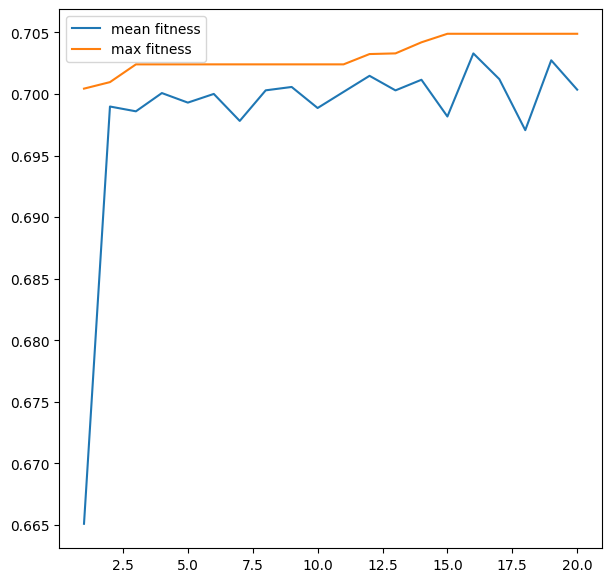


#############################
#			STATS			#
#############################


Total running time: 13 minutes, 21 seconds


Population size: 8
Number variables: 91
Selection rate: 0.25
Mutation rate: 0.1
Number Generations: 20

Best fitness: 0.7048926144392541
Best individual: [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
None


In [163]:
solver = MyBinaryGenAlgSolver(pop_size=8, n_genes=91, mutation_rate=0.1, max_gen=20, selection_rate=0.25)
best_solution = solver.solve()
print(best_solution)

In [164]:
Best_individual = [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,]


selected_features = [feature_ranking_total[i] for i, value in enumerate(Best_individual) if value == 1]
print(selected_features)

['bun_min', 'weight_admit', 'admission_age', 'gcs_verbal', 'pt_max', 'ptt_max', 'pco2_max', 'aniongap_max', 'inr_max', 'baseexcess_min', 'po2_max', 'dbp_min', 'po2_min', 'totalco2_max', 'glucose_max', 'totalco2_min', 'aniongap_min', 'potassium_max.1', 'bicarbonate_min.1', 'mbp_min', 'spo2_min', 'baseexcess_max', 'glucose_max.2', 'ph_max', 'pt_min', 'lactate_min', 'glucose_mean', 'hemoglobin_min.1', 'gcs_unable', 'resp_rate_max', 'dbp_mean', 'hematocrit_min.1', 'pco2_min', 'mbp_max', 'mbp_mean', 'temperature_mean', 'gcs_motor', 'glucose_min.2', 'heart_rate_mean', 'calcium_min.1', 'hematocrit_max.1', 'platelets_min', 'dbp_max', 'abs_lymphocytes_min', 'abs_neutrophils_min', 'abs_neutrophils_max', 'bicarbonate_max.1', 'abs_lymphocytes_max', 'temperature_min', 'id', 'heart_rate_min', 'sodium_min.1', 'gcs_min', 'calcium_max.1', 'abs_monocytes_min', 'abs_basophils_max', 'abs_eosinophils_max', 'resp_rate_min', 'spo2_max', 'gender', 'race_encode_Caucasian', 'race_encode_Asian']


In [165]:
# Reducing feature dimension of train and test data after genetic algorithm feature selection

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [166]:
# Base Tree model with selected features

rf.fit(X_train_selected, y_train)

y_train_pred = rf.predict(X_train_selected)
y_test_pred = rf.predict(X_test_selected)
y_test_pred_proba = rf.predict_proba(X_test_selected)

In [167]:
print("Train Accuracy:\n", classification_report(y_train, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))
# print("\n\nExternal Test Accuracy:\n", classification_report(y_holdout, y_holdout_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.55      0.74      0.63     11797
           1       1.00      0.00      0.00      6872
           2       0.46      0.69      0.55     11444
           3       0.65      0.32      0.43      5531

    accuracy                           0.51     35644
   macro avg       0.66      0.44      0.40     35644
weighted avg       0.62      0.51      0.45     35644



Test Accuracy:
               precision    recall  f1-score   support

           0       0.51      0.70      0.59      3339
           1       0.00      0.00      0.00      1961
           2       0.42      0.62      0.50      3296
           3       0.54      0.27      0.36      1588

    accuracy                           0.47     10184
   macro avg       0.37      0.40      0.36     10184
weighted avg       0.39      0.47      0.41     10184



C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [168]:
auroc_test = roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr', average='macro')
print(auroc_test)

0.69907913631076


In [172]:
param_grid = {
    'n_estimators': [30, 50, 100, 200],
    'max_depth': np.arange(start=3,stop=10,step=1),
    'min_samples_split': [4, 8, 12, 16, 20]
}

grid_clf_auc = GridSearchCV(rf, param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc_ovr')
grid_clf_auc.fit(X_train_selected, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=8, min_samples_split=10,
                                              random_state=42),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [4, 8, 12, 16, 20],
                         'n_estimators': [30, 50, 100, 200]},
             scoring='roc_auc_ovr')

In [173]:
grid_clf_auc.best_params_

{'max_depth': 9, 'min_samples_split': 16, 'n_estimators': 200}

In [177]:
y_train_pred = grid_clf_auc.predict(X_train_selected)
y_test_pred = grid_clf_auc.predict(X_test_selected)
y_holdout_pred = grid_clf_auc.predict(X_holdout[selected_features])

y_holdout_proba_pred = grid_clf_auc.predict_proba(X_holdout[selected_features])
roc_auc_score(y_holdout, y_holdout_proba_pred, multi_class='ovr', average='macro')

0.6941995593430847

In [175]:
print("Train Accuracy:\n", classification_report(y_train, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))
print("\n\nExternal Test Accuracy:\n", classification_report(y_holdout, y_holdout_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.56      0.76      0.65     11797
           1       1.00      0.01      0.01      6872
           2       0.48      0.71      0.58     11444
           3       0.69      0.37      0.48      5531

    accuracy                           0.54     35644
   macro avg       0.69      0.46      0.43     35644
weighted avg       0.64      0.54      0.48     35644



Test Accuracy:
               precision    recall  f1-score   support

           0       0.51      0.69      0.59      3339
           1       0.00      0.00      0.00      1961
           2       0.43      0.63      0.51      3296
           3       0.55      0.28      0.37      1588

    accuracy                           0.47     10184
   macro avg       0.37      0.40      0.37     10184
weighted avg       0.39      0.47      0.42     10184



External Test Accuracy:
               precision    recall  f1-score   support

           0 

C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [178]:
y_test_proba_pred = grid_clf_auc.predict_proba(X_test_selected)
roc_auc_score(y_test, y_test_proba_pred, multi_class='ovr', average='macro')

0.7022038742820477

### SMOTE

In [182]:
smote_sampler = SMOTE(random_state=12,sampling_strategy='auto')
X_df_SMOTE, y_df_SMOTE = smote_sampler.fit_resample(X_train_selected, y_train)

In [183]:
y_train.value_counts()

0    11797
2    11444
1     6872
3     5531
Name: aki, dtype: int64

In [184]:
y_df_SMOTE.value_counts()

3    11797
1    11797
0    11797
2    11797
Name: aki, dtype: int64

In [187]:
rf = RandomForestClassifier(
    max_depth=9, 
    min_samples_split=16,
    n_estimators=200,
    random_state=40, 
)


rf_SMOTE = rf.fit(X_df_SMOTE, y_df_SMOTE)


In [188]:
y_train_pred = rf_SMOTE.predict(X_df_SMOTE)
y_test_pred = rf_SMOTE.predict(X_test_selected)
y_holdout_pred = rf_SMOTE.predict(X_holdout[selected_features])

print(confusion_matrix(y_df_SMOTE, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))
print(confusion_matrix(y_holdout, y_holdout_pred))

[[8439  708 1840  810]
 [3064 4931 1765 2037]
 [3131  559 6291 1816]
 [1014  709 1314 8760]]
[[2227  237  619  256]
 [ 815  196  636  314]
 [1028  211 1416  641]
 [ 279   39  443  827]]
[[1119  116  362  127]
 [ 429   97  329  150]
 [ 490   99  653  306]
 [ 142   27  229  417]]


In [189]:
print("Train Accuracy:\n", classification_report(y_df_SMOTE, y_train_pred))
print("\n\nTest Accuracy:\n", classification_report(y_test, y_test_pred))
print("\n\nExternal Test Accuracy:\n", classification_report(y_holdout, y_holdout_pred))

Train Accuracy:
               precision    recall  f1-score   support

           0       0.54      0.72      0.61     11797
           1       0.71      0.42      0.53     11797
           2       0.56      0.53      0.55     11797
           3       0.65      0.74      0.69     11797

    accuracy                           0.60     47188
   macro avg       0.62      0.60      0.60     47188
weighted avg       0.62      0.60      0.60     47188



Test Accuracy:
               precision    recall  f1-score   support

           0       0.51      0.67      0.58      3339
           1       0.29      0.10      0.15      1961
           2       0.45      0.43      0.44      3296
           3       0.41      0.52      0.46      1588

    accuracy                           0.46     10184
   macro avg       0.41      0.43      0.41     10184
weighted avg       0.43      0.46      0.43     10184



External Test Accuracy:
               precision    recall  f1-score   support

           0 